Take a centered 128 x 128 sub-image of Given CT Image Data set (Pick a section
with lots of good features):
1. Obtain 180 Projections.
2. Take 1-D Fourier Transform of all Projections.
3. Assemble them in the 2-D Frequency Domain.
4. Compare Result Direct 2-D FT of the 128 x 128 Image.
5. Perform Inverse 2-D FT & Compare Both Images



You should comment on what you have observed of displayed images
(characteristics, differences, reasons).

In [1]:
import cv2
import numpy as np
from scipy.ndimage import rotate
from scipy.fft import fft
import matplotlib.pyplot as plt
from skimage.transform import radon, iradon, rescale, resize
from google.colab.patches import cv2_imshow

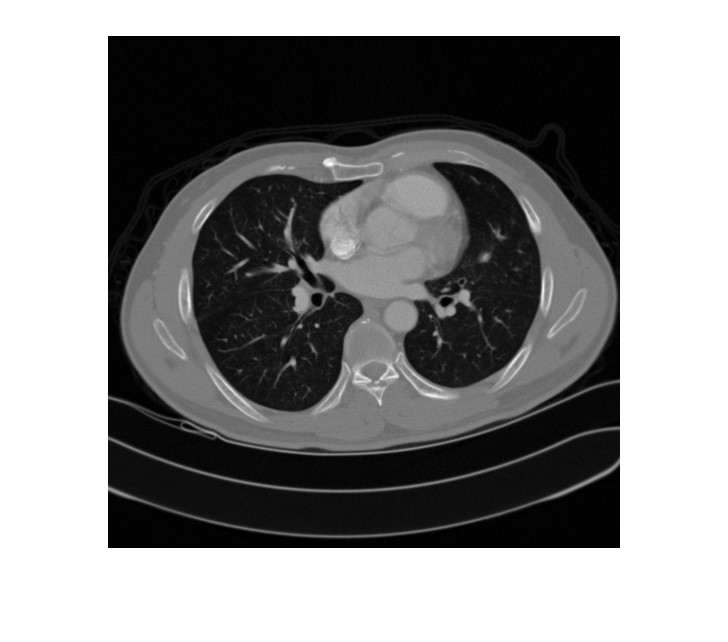

In [2]:
ct_image = cv2.imread('/content/lungs.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(ct_image)

print(ct_image.shape)

(642, 728)


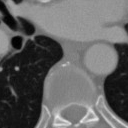

In [3]:
#getting center of the image
height, width = ct_image.shape

middle_width = 128
middle_height = 128

left = (width - middle_width) // 2
top = (height - middle_height) // 2
right = (width + middle_width) // 2
bottom = (height + middle_height) // 2

middle_section = ct_image[top:bottom, left:right]

cv2_imshow(middle_section)

In [4]:
# num_angles = 180
# projections = {}
# ft_projections = {}

# for angle in range(num_angles):
#     rotated_image = np.rot90(middle_section, k=angle)  # rotating the image at each angle
#     projection = np.sum(rotated_image, axis=1)  # obtaining 1-D Projection
#     projections[angle]=projection

#     ft_projection = np.fft.fft(projection)  # performing FT on the projection
#     ft_projections[angle]=ft_projection


In [5]:
# ft_projections = ft_projections[:128] #clipping the data to 128 size
# ft_2d = np.array(ft_projections)

# #assembling them in the 2-D Frequency Domain
# frequency_domain_image = np.column_stack(ft_2d).T  #stacking them one on other; it should instead be done by using polar angles
# inverse_backprojection = np.fft.ifft2(frequency_domain_image) #inverse ft of the projections ft

In [6]:
theta = np.linspace(0, 180, max(middle_section.shape), endpoint=False)
projections = radon(middle_section, theta=theta, circle=False)

inverse_backprojection = iradon(projections, theta=theta, filter_name='ramp', circle=False)

In [7]:
direct_2d_fft = np.fft.fft2(middle_section) # taking Direct 2-D FT of the image
inverse_direct_fft = np.fft.ifft2(direct_2d_fft) #inverse ft of the direct ft

#calculating error
mse1 = np.mean(np.abs(middle_section - np.abs(inverse_backprojection)) ** 2)
mse2 = np.mean(np.abs(middle_section - np.abs(inverse_direct_fft)) ** 2)

print("Mean Squared Error from projections:", mse1)
print("Mean Squared Error from direct FFT:", mse2)

Mean Squared Error from projections: 12913.946326052901
Mean Squared Error from direct FFT: 1.3348968068790323e-28


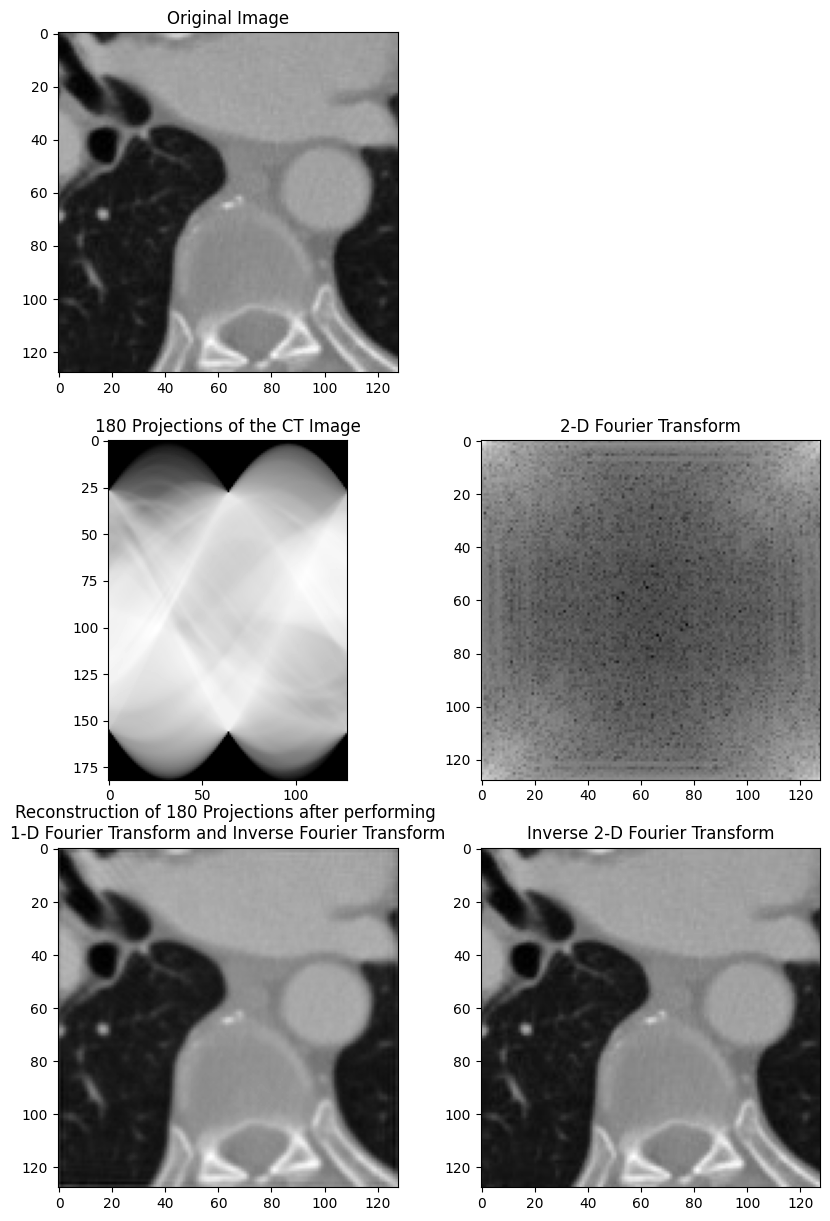

In [8]:
# Display images
plt.figure(figsize=(10, 15))
plt.subplot(321)
plt.title("Original Image")
plt.imshow(middle_section, cmap='gray')

plt.subplot(323)
plt.title("180 Projections of the CT Image")
plt.imshow(np.log(np.abs(projections)+1), cmap='gray')

plt.subplot(324)
plt.title("2-D Fourier Transform")
plt.imshow(np.log(np.abs(direct_2d_fft)), cmap='gray')

plt.subplot(325)
plt.title("Reconstruction of 180 Projections after performing \n1-D Fourier Transform and Inverse Fourier Transform")
plt.imshow(np.abs(inverse_backprojection), cmap='gray')

plt.subplot(326)
plt.title("Inverse 2-D Fourier Transform")
plt.imshow(np.abs(inverse_direct_fft), cmap='gray')

plt.show()